In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [118]:
#minha funcao para mostrar as imagens
def imshow(im,big=False):
    if big:
        plt.figure(figsize=(20,20))
    else:
        plt.figure()
    if len(im.shape)<3:
        plt.imshow(im, cmap='gray')#As cores ficam zoadas no Jupyter se deixar sem esse parâmetro
    else:
        plt.imshow(im) 
    plt.axis('off')
    plt.show()

In [58]:
def f2i(im):#float to int
    return np.round(im * 255.0).astype('uint8')

### 1. Abrindo Imagem

60.bmp<br>
82.bmp<br>
114.bmp<br>
150.bmp<br>
205.bmp

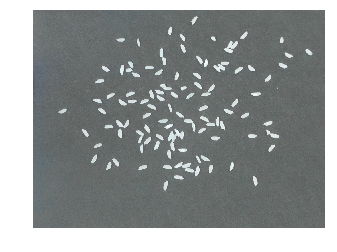

In [97]:
im = cv2.imread("114.bmp")
imshow(im)

### 2. Convertendo para escala de cinza

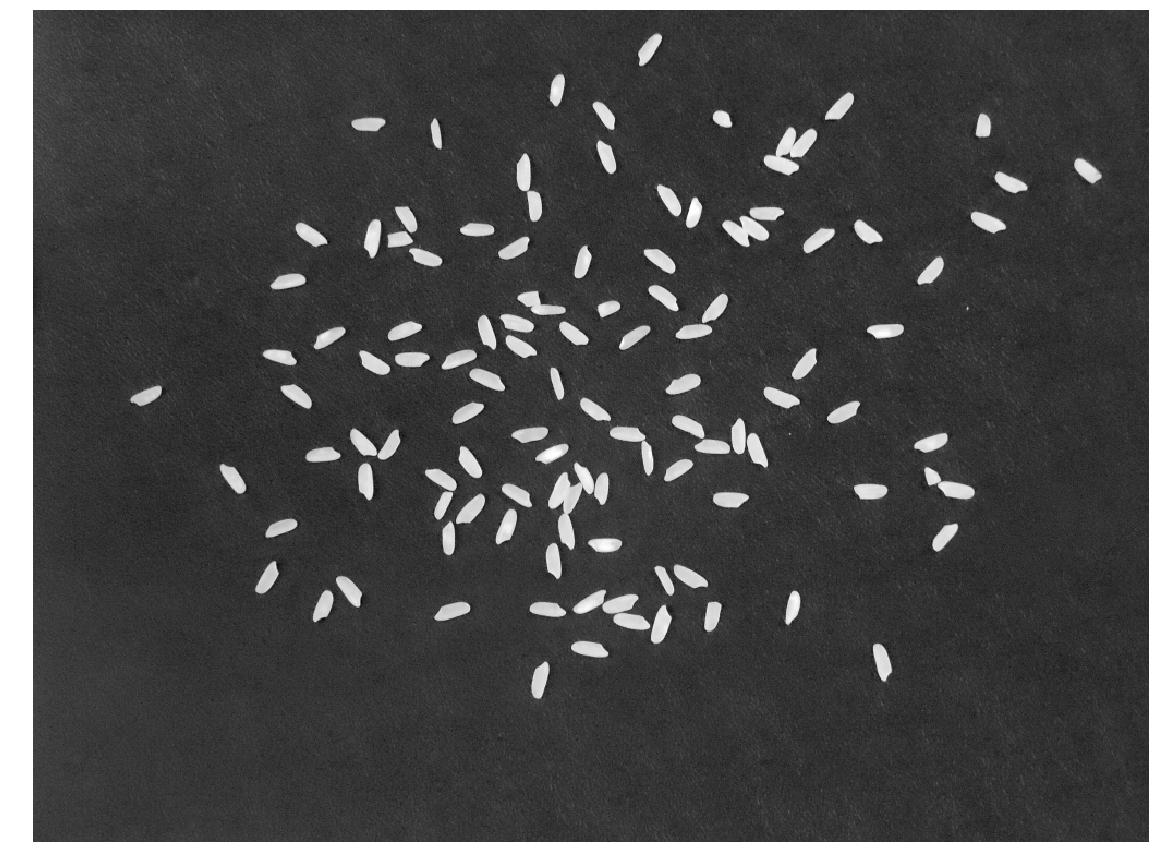

In [103]:
def cinza(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cinza(im)
imshow(im_gray,True)

### Gradiente

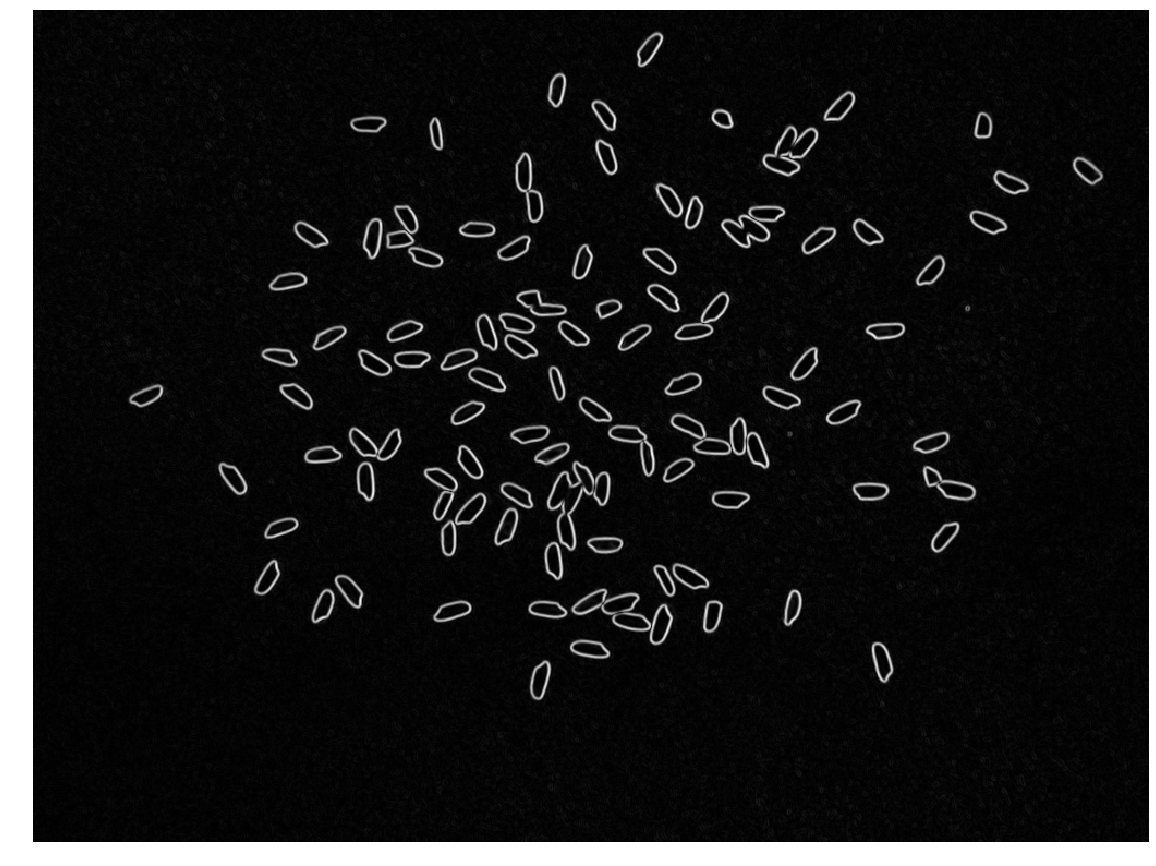

In [104]:
def grad(im_gray,ksize=5):
    #sobel
    sobelx = cv2.Sobel(im_gray,cv2.CV_64F,1,0,ksize=ksize)
    sobely = cv2.Sobel(im_gray,cv2.CV_64F,0,1,ksize=ksize)
    im_grad = np.sqrt(sobelx**2+sobely**2)
    #normaliza
    im_grad = (im_grad-im_grad.min())/(im_grad.max()-im_grad.min())
    return im_grad
im_grad = grad(im_gray)
imshow(im_grad,True)

### Limiarização global

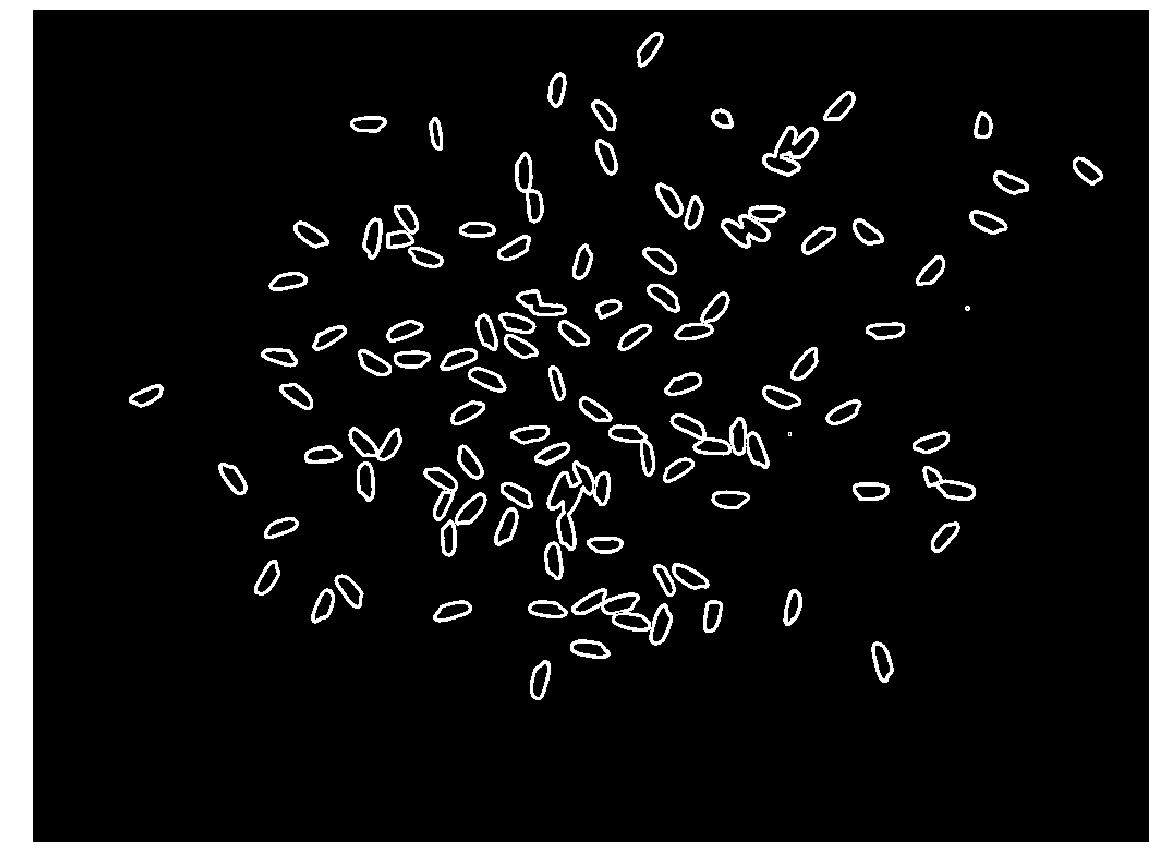

In [105]:
def limiarizacao_global(im, limite = 0.2):
    ret,im_limiarizacao_global = cv2.threshold(im,limite, 1.0, cv2.THRESH_BINARY)
    return im_limiarizacao_global
im_limiarizacao_global = limiarizacao_global(im_grad)
imshow(im_limiarizacao_global,True)

In [101]:
im_limiarizacao_global.max()

1.0

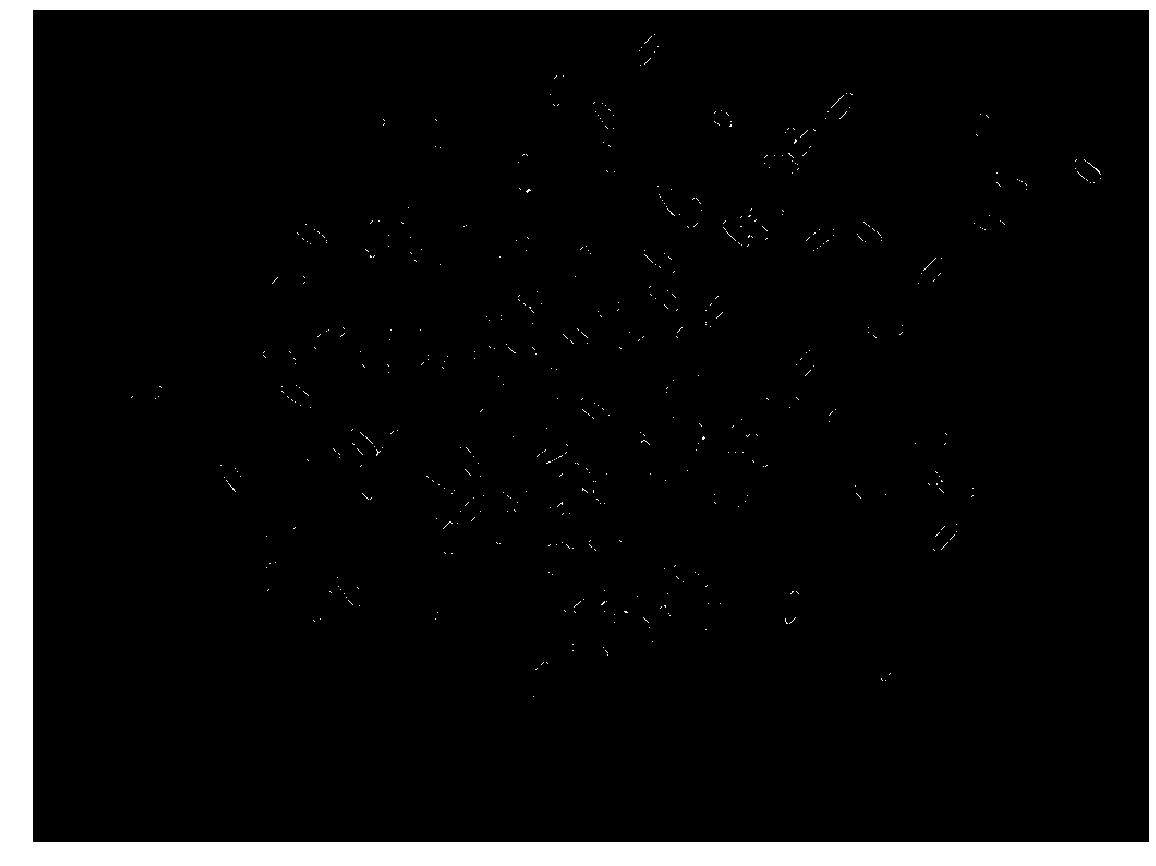

In [102]:
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]]).astype('uint8')
kernel = np.array([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]]).astype('uint8')
im_erode = cv2.erode(im_limiarizacao_global,kernel,iterations = 1)
im_close = cv2.morphologyEx(im_limiarizacao_global, cv2.MORPH_CLOSE, kernel)
im_open = cv2.morphologyEx(im_limiarizacao_global, cv2.MORPH_OPEN, kernel)
imshow(im_erode,True)

# Pipelines

60.bmp<br>
82.bmp<br>
114.bmp<br>
150.bmp<br>
205.bmp

In [133]:
def pipeline1(path):
    im = cv2.imread(path)
    im_gray = cinza(im)
    im_grad = grad(im_gray,13)
    im_bin = limiarizacao_global(im_grad,0.2)
    imshow(im_bin,True)
    return im_bin

In [134]:
def testa_pipeline(pipeline,paths):
    for path in paths:
        print(path)
        pipeline(path)

60.bmp


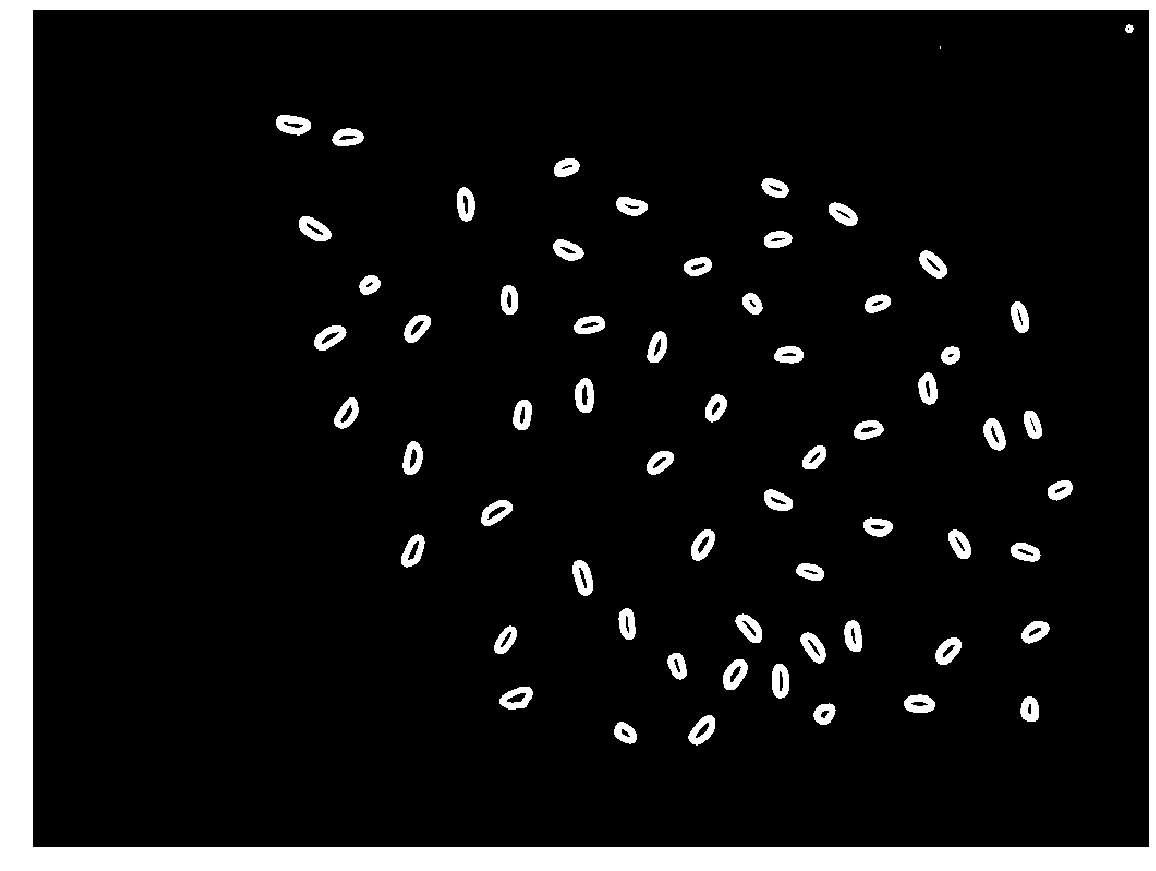

82.bmp


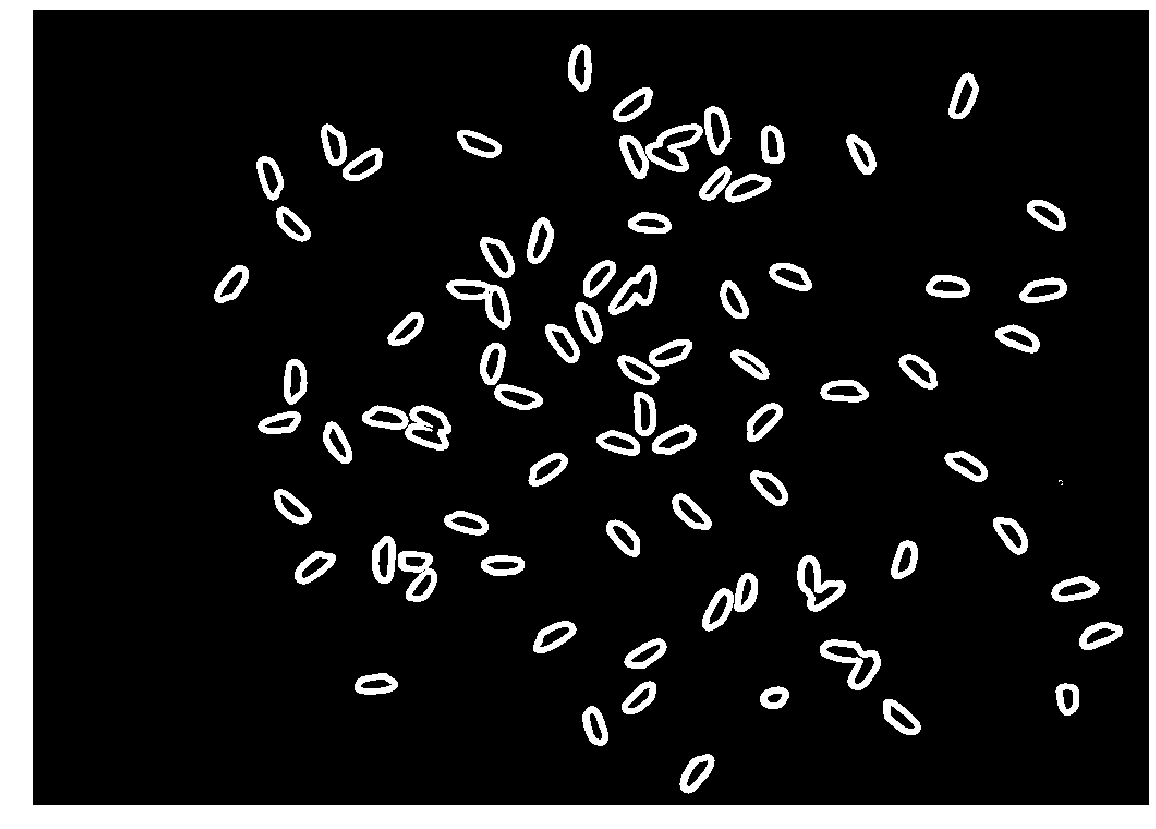

114.bmp


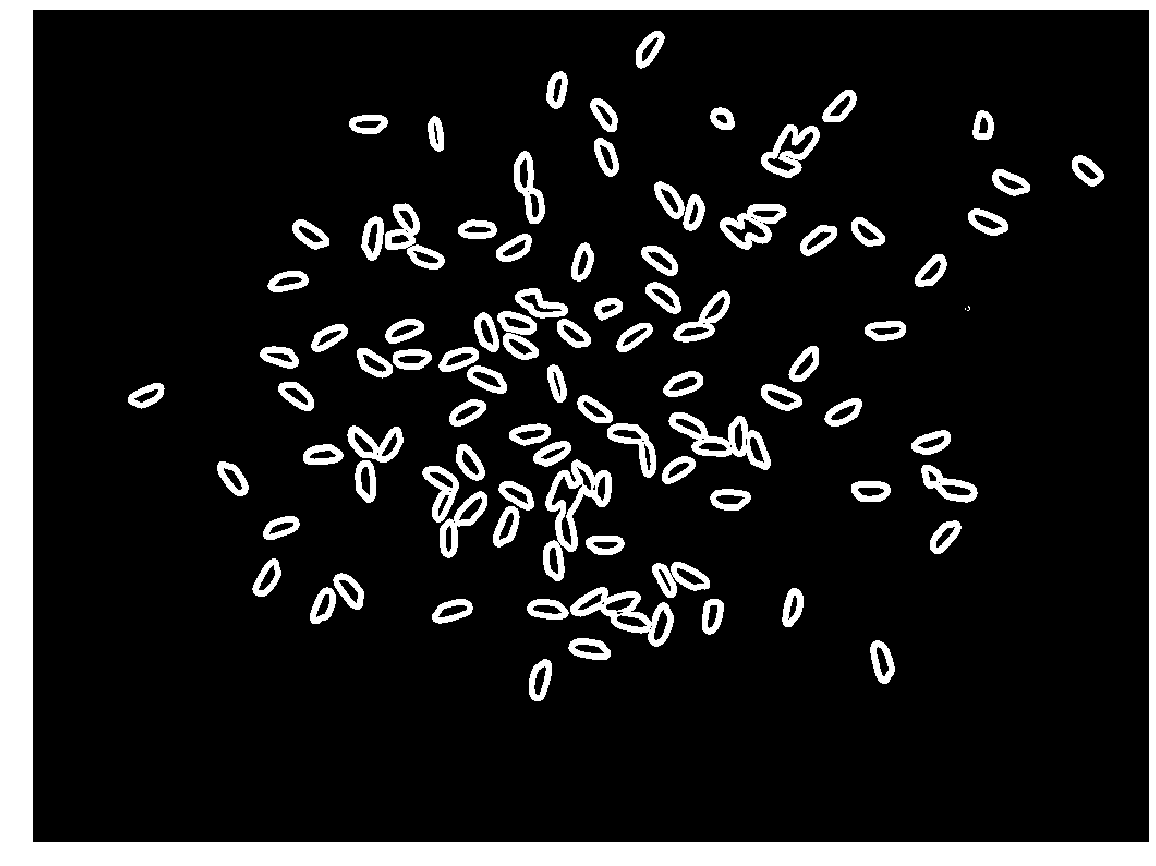

150.bmp


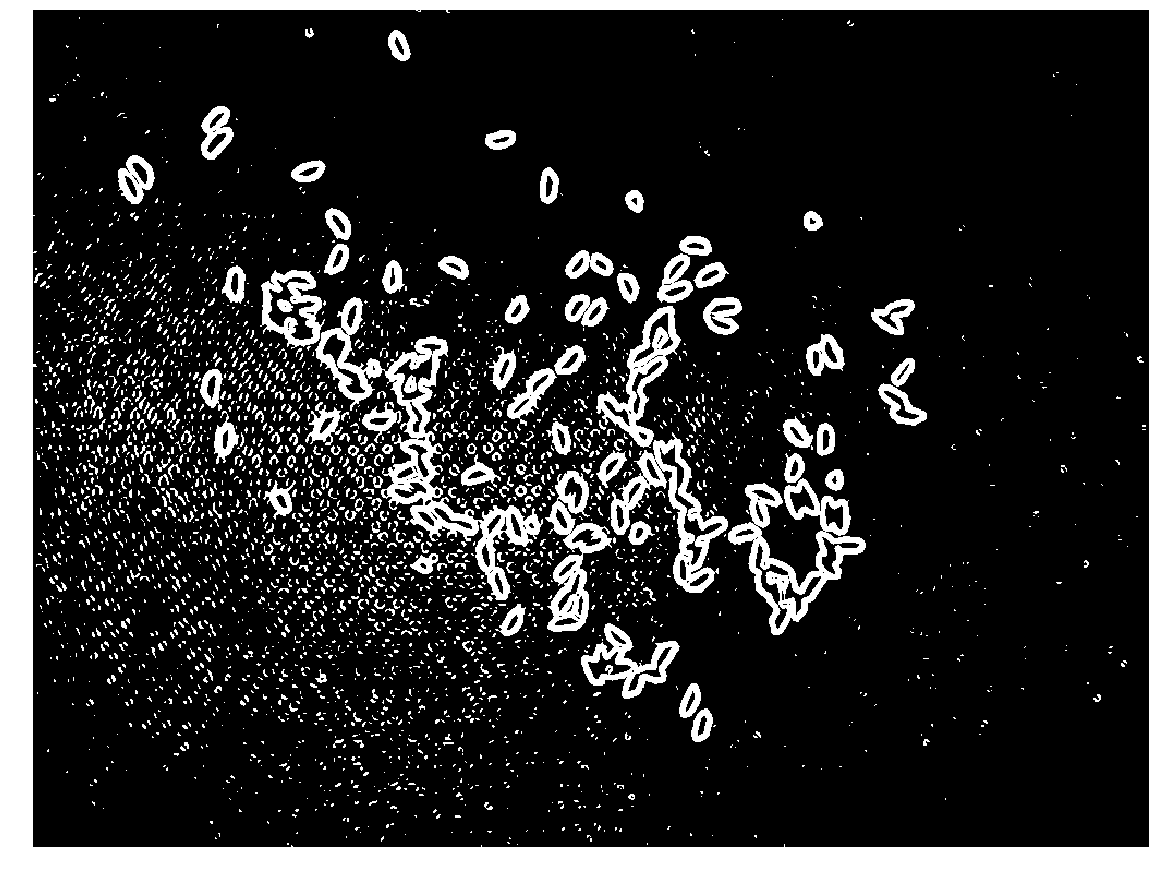

205.bmp


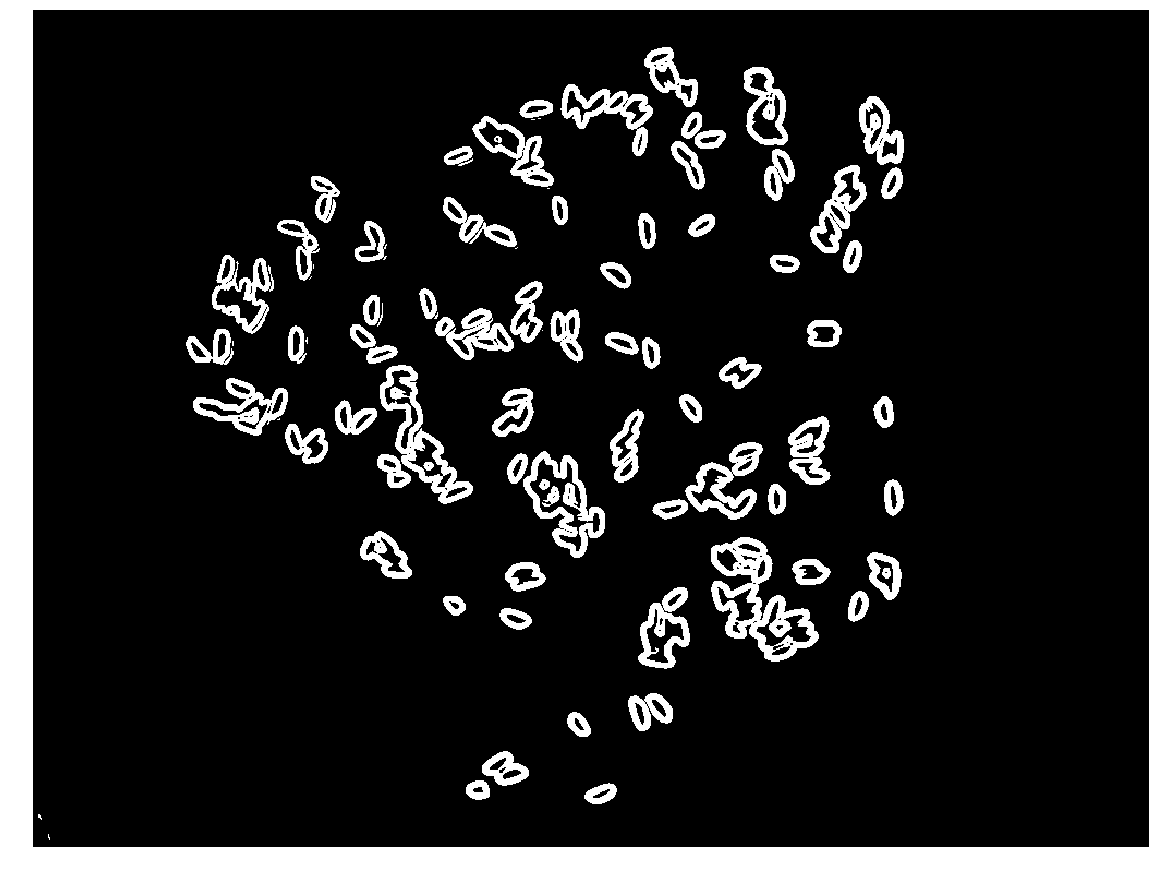

In [135]:
paths = ["60.bmp","82.bmp","114.bmp","150.bmp","205.bmp"]
testa_pipeline(pipeline1,paths)